In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Input,Lambda,Dense,Flatten
from keras.optimizers import Adam
from keras.models import Model
from keras.applications.resnet import ResNet152
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint,EarlyStopping
from glob import glob

In [13]:
Image_size = [224,224]

In [14]:
train_path = '/content/drive/My Drive/Face_mask_detection/dataset/train'
validation_path = '/content/drive/My Drive/Face_mask_detection/dataset/valid'

In [15]:
Resnet = ResNet152(input_shape=Image_size + [3],weights='imagenet',include_top=False)

234700800/234698864 [==============================] - 3s 0us/step


In [16]:
for layer in Resnet.layers:
  layer.trainable = False

In [17]:
folders = glob('/content/drive/My Drive/Face_mask_detection/dataset/train/*')

In [18]:
print(len(folders))

2


In [19]:
X = Flatten()(Resnet.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(X)

In [21]:
model = Model(inputs=Resnet.input, outputs=prediction)

In [22]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [29]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=Adam(lr=0.001),
  metrics=['accuracy']
)

In [30]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [31]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
 

Found 3649 images belonging to 2 classes.
Found 806 images belonging to 2 classes.


In [32]:
# save best model using vall accuracy
model_path = '/content/drive/My Drive/Face_mask_detection/Models/Face_mask.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
callbacks_list = [checkpoint]

In [33]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)
 

Epoch 1/10
 24/115 [=====>........................] - ETA: 31:55 - loss: 2.2050 - accuracy: 0.5305

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


115/115 [==============================] - ETA: 0s - loss: 1.0298 - accuracy: 0.6607 
Epoch 00001: val_accuracy improved from -inf to 0.59429, saving model to /content/drive/My Drive/Face_mask_detection/Models/Face_mask.h5
115/115 [==============================] - 3358s 29s/step - loss: 1.0298 - accuracy: 0.6607 - val_loss: 0.7994 - val_accuracy: 0.5943
Epoch 2/10
115/115 [==============================] - ETA: 0s - loss: 0.5558 - accuracy: 0.7424
Epoch 00002: val_accuracy improved from 0.59429 to 0.64764, saving model to /content/drive/My Drive/Face_mask_detection/Models/Face_mask.h5
115/115 [==============================] - 63s 545ms/step - loss: 0.5558 - accuracy: 0.7424 - val_loss: 0.7936 - val_accuracy: 0.6476
Epoch 3/10
115/115 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7753
Epoch 00003: val_accuracy improved from 0.64764 to 0.83127, saving model to /content/drive/My Drive/Face_mask_detection/Models/Face_mask.h5
115/115 [============================

In [34]:
model.save('/content/drive/My Drive/Face_mask_detection/Models/Face_mask1.h5')

In [35]:
training_set.class_indices

{'with_mask': 0, 'without_mask': 1}

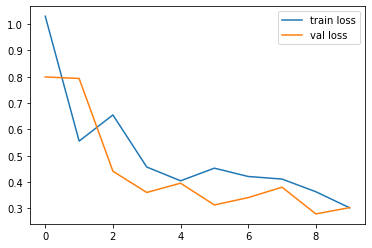

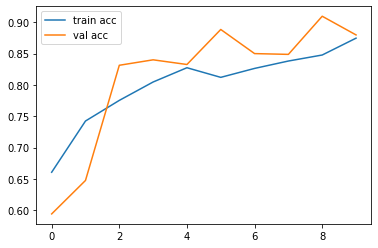

In [39]:
# plot the error
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
 
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()